# Pymaceuticals Inc.
---

### Analysis

The Pymaceuticals, Inc. dataset looks at a group of mice put on various drug regimens to try to reduce the size of tumors. The groups were fairly evenly divided between male and female mice, with the males having slightly more than the females. The weights and ages were varied, allowing for a more accurate idea of how the regimens worked when it came to age, gender, and weight in grams.

Upon review of the data collected during the study, it appears that the best response to medication came from giving the mice Capomulin and Ramicane, which reduced the size of the tumors to a greater degree than the other drug regimens. This can be seen most clearly looking at the box plot, which shows the final size of the tumors with Capomulin and Ramicane having the smallest tumors at the end of the study. While the scatter plot revealed that the results varied and had some outliers, there is a relatively linear correlation between the Capomulin drug regimen and the reduction in the size of the tumors. 

Overall, the conclusion can be drawn that there is a correlation between the drug regimen given to the mice and the size of the tumors over time, with Capomulin and Ramicane working best in the study. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
pyma_data_complete = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
pyma_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [2]:
# Checking the number of mice.
pyma_data_complete["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ID = pyma_data_complete.loc[pyma_data_complete.duplicated(subset = ["Mouse ID", "Timepoint"]), 'Mouse ID'].unique()
duplicate_mice_ID


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = pyma_data_complete.loc[pyma_data_complete["Mouse ID"] == duplicate_mice_ID[0]]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0
591,g989,Propriva,Female,21,26,10,49.880528,0
592,g989,Propriva,Female,21,26,15,51.325852,1
593,g989,Propriva,Female,21,26,15,53.442020,0
594,g989,Propriva,Female,21,26,20,55.326122,1
595,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = pyma_data_complete.drop_duplicates(keep = "first")
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_vol_mean = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tumor_vol_median = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_vol_var = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_vol_std = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std
tumor_vol_sem = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
stat_summary = pd.DataFrame({"Mean":tumor_vol_mean, "Median":tumor_vol_median, "Variance":tumor_vol_var, "Standard Dev":tumor_vol_std, "SEM":tumor_vol_sem})
stat_summary

,Mean,Median,Variance,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,<bound method GroupBy.std of <pandas.core.grou...,0.329346
Ceftamin,52.591172,51.776157,39.290177,<bound method GroupBy.std of <pandas.core.grou...,0.469821
Infubinol,52.884795,51.820584,43.128684,<bound method GroupBy.std of <pandas.core.grou...,0.492236
Ketapril,55.235638,53.698743,68.553577,<bound method GroupBy.std of <pandas.core.grou...,0.603860
Naftisol,54.331565,52.509285,66.173479,<bound method GroupBy.std of <pandas.core.grou...,0.596466
Placebo,54.033581,52.288934,61.168083,<bound method GroupBy.std of <pandas.core.grou...,0.581331
Propriva,52.368318,50.909965,42.278090,<bound method GroupBy.std of <pandas.core.grou...,0.514041
Ramicane,40.216745,40.673236,23.486704,<bound method GroupBy.std of <pandas.core.grou...,0.320955
Stelasyn,54.233149,52.431737,59.450562,<bound method GroupBy.std of <pandas.core.grou...,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregate_summary = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
aggregate_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

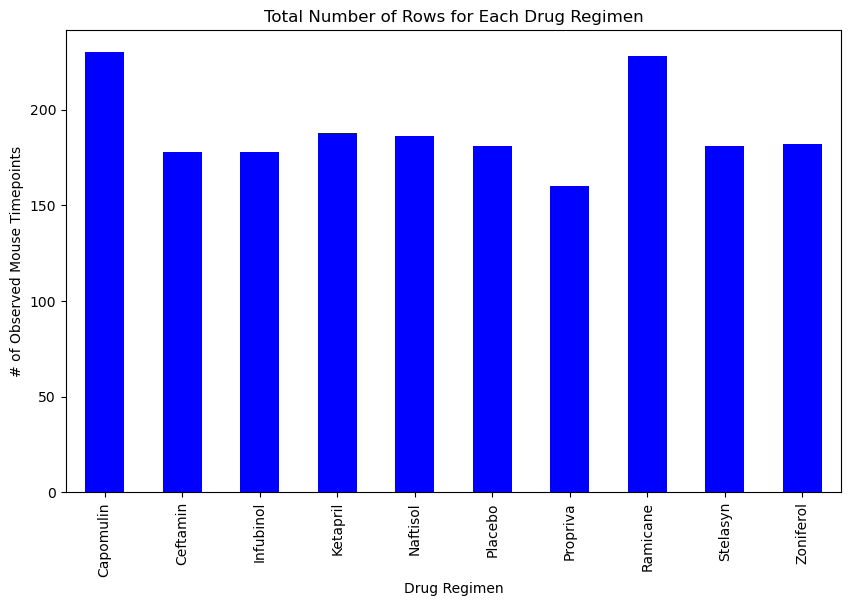

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_graph = clean_df.groupby("Drug Regimen").count()["Mouse ID"]
regimen_graph.plot(kind="bar", color="blue", figsize=(10, 6))
plt.title("Total Number of Rows for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

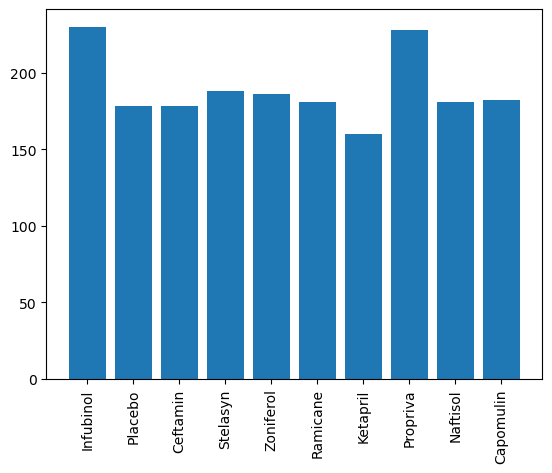

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = clean_df["Drug Regimen"].unique()
y_axis = clean_df.groupby(["Drug Regimen"])["Timepoint"].count()
plt.xlabel = ("Drug Regimen")
plt.ylabel = ("Number of Observed Mouse Timepoints")
plt.bar(x_axis, y_axis)
plt.xticks(rotation=90)
plt.show()

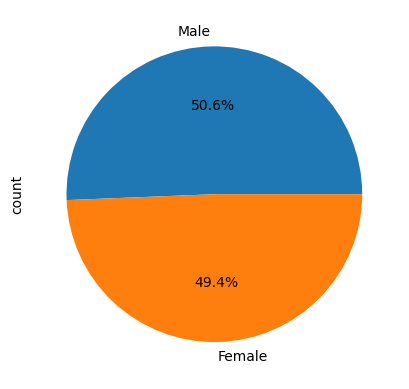

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_female_dist = clean_df['Sex'].value_counts()
male_female_dist.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel = ('Sex')
plt.show()

TypeError: 'str' object is not callable

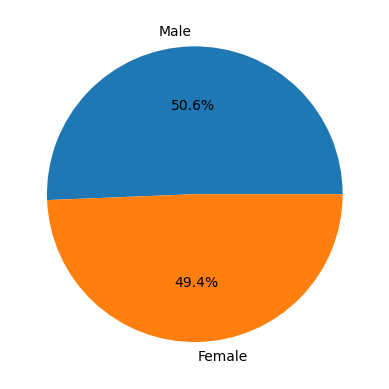

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = male_female_dist.index
sizes = male_female_dist.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tumor_volume = pd.merge(clean_df, last_timepoint, how="right", on=["Mouse ID", "Timepoint"])
last_tumor_volume

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z578,Ramicane,Male,11,16,45,30.638696,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []
tumor_data = pd.DataFrame()


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatment_list:
    tumor_volume = last_tumor_volume.loc[last_tumor_volume["Drug Regimen"] == treatment, ["Drug Regimen", "Tumor Volume (mm3)"]]
    
    # add subset 
    tumor_volume_list.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    tumor_vol_quartile = tumor_volume["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lower_quartile = tumor_vol_quartile[.25]
    upper_quartile = tumor_vol_quartile[.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5*iqr)
    upper_bound = upper_quartile + (1.5*iqr)
    outliers = tumor_volume.loc[(tumor_volume["Tumor Volume (mm3)"]<lower_bound) |(tumor_volume["Tumor Volume (mm3)"]>upper_bound)]

    print(f"For {treatment} potential outliers are {outliers}")
    print(f"The median tumor volume is {tumor_vol_quartile[.5]} with the upper quartile at {upper_bound} and the lower quartile at {lower_bound}.")


For Capomulin potential outliers are Empty DataFrame
Columns: [Drug Regimen, Tumor Volume (mm3)]
Index: []
The median tumor volume is 38.1251644 with the upper quartile at 51.83201549 and the lower quartile at 20.70456164999999.
For Ramicane potential outliers are Empty DataFrame
Columns: [Drug Regimen, Tumor Volume (mm3)]
Index: []
The median tumor volume is 36.56165229 with the upper quartile at 54.30681135 and the lower quartile at 17.912664470000003.
For Infubinol potential outliers are    Drug Regimen  Tumor Volume (mm3)
31    Infubinol           36.321346
The median tumor volume is 60.16518046 with the upper quartile at 82.74144559000001 and the lower quartile at 36.83290494999999.
For Ceftamin potential outliers are Empty DataFrame
Columns: [Drug Regimen, Tumor Volume (mm3)]
Index: []
The median tumor volume is 59.85195552 with the upper quartile at 87.66645829999999 and the lower quartile at 25.355449580000002.


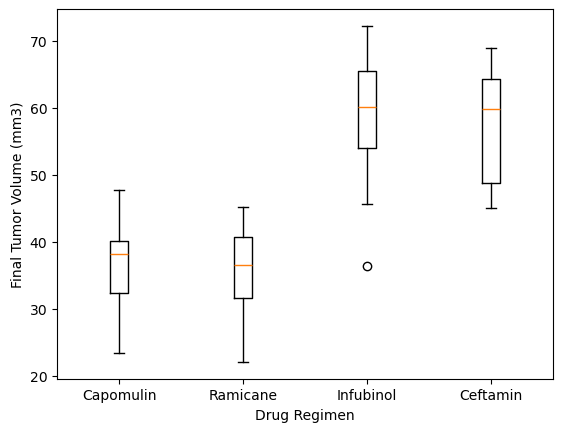

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
for treatment in treatment_list:
    data = last_tumor_volume[last_tumor_volume["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    ax1.boxplot(data, positions = [treatment_list.index(treatment) + 1], labels = [treatment])
    ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
plt.show()

## Line and Scatter Plots

TypeError: 'str' object is not callable

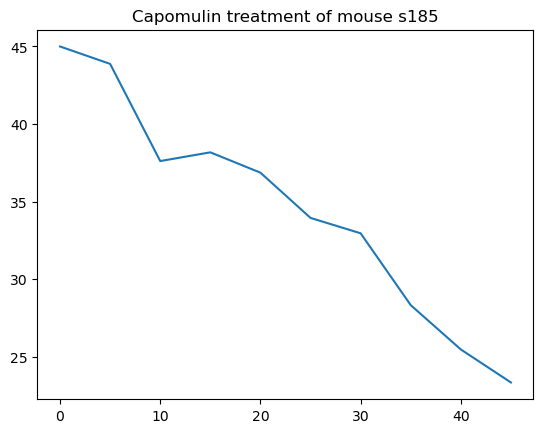

In [31]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_data = clean_df.loc[(clean_df['Drug Regimen'] == 'Capomulin') & (clean_df['Mouse ID'] == 's185')]
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.title('Capomulin treatment of mouse s185')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

TypeError: 'str' object is not callable

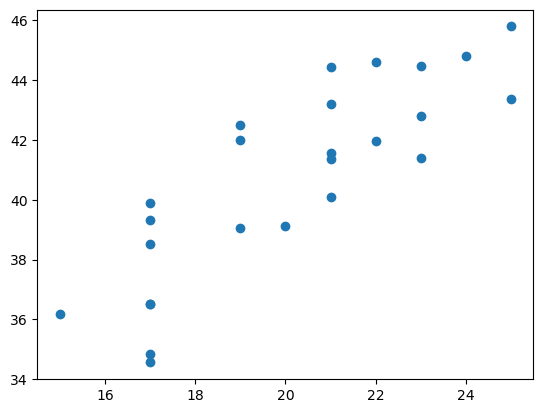

In [32]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
capomulin_data = capomulin_data[['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']]
avg_tumor_vol_per_mouse = capomulin_data.groupby('Mouse ID').mean()
plt.scatter(avg_tumor_vol_per_mouse['Weight (g)'], avg_tumor_vol_per_mouse['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


TypeError: 'str' object is not callable

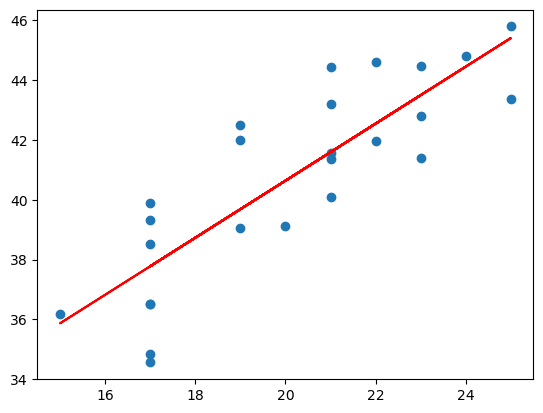

In [35]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

capomulin_avg = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})
correlation = st.pearsonr(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])[0]
(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
regress_values = capomulin_avg['Weight (g)'] * slope + intercept

print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}")

plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
plt.plot(capomulin_avg['Weight (g)'], regress_values, "r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()